# Test rooki regridding and subsetting 

In [2]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki
from rooki import operators as ops

In [3]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## Just test downloading some data first

In [4]:
# select different data to the example - c3s-cmip6.CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.r1i1p1f1.Ofx.sftof.gn.v20191108
test = ops.Input(
    'sftof', ['c3s-cmip6.CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.r1i1p1f1.Ofx.sftof.gn.v20191108']
)
wf = ops.Subset(test) # always need to define a workflow, even if don't pass any options

In [5]:
resp = wf.orchestrate()
resp.ok 

True

In [6]:
resp.download_urls()

['https://data.mips.climate.copernicus.eu/thredds/fileServer/esg_c3s-cmip6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Ofx/sftof/gn/v20191108/sftof_Ofx_ACCESS-CM2_historical_r1i1p1f1_gn.nc']

In [7]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 9MB
Dimensions:             (j: 300, i: 360, vertices: 4)
Coordinates:
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB ...
    longitude           (j, i) float64 864kB ...
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
    sftof               (j, i) float32 432kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T18:26:23Z
    ...                     ...
    tracking_id:            hdl:21.14100/cbeb0aab-4990-412c-813a-043aa318a5f0
    variable_id:            sftof
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    license:                CMIP6 model data produced by CSIRO is licensed un...

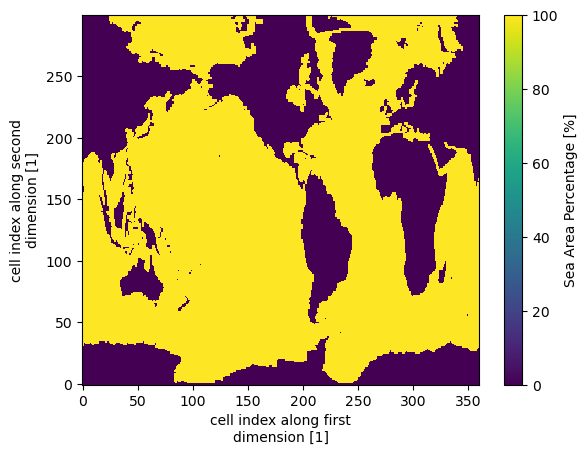

In [8]:
ds.sftof.plot()

## Same data but regrid now

In [9]:
# as above but with regridding
test = ops.Input(
    'sftof', ['c3s-cmip6.CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.r1i1p1f1.Ofx.sftof.gn.v20191108']
)
wf = ops.Regrid(wf, method="nearest_s2d", grid="0pt25deg")



In [10]:
resp = wf.orchestrate()
resp.ok 

True

In [11]:
resp.download_urls()

['http://rook7.cloud.dkrz.de:80/outputs/rook/c5963738-a416-11f0-aa51-fa163eb671ca/sftof_Ofx_ACCESS-CM2_historical_r1i1p1f1_gr_regrid-nearest_s2d-720x1440_cells_grid.nc']

In [12]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 4MB
Dimensions:   (lat: 720, lon: 1440, bnds: 2)
Coordinates:
    lat_bnds  (lat, bnds) float64 12kB ...
    lon_bnds  (lon, bnds) float64 23kB ...
  * lat       (lat) float64 6kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon       (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Dimensions without coordinates: bnds
Data variables:
    sftof     (lat, lon) float32 4MB ...
Attributes: (12/52)
    Conventions:                  CF-1.7 CMIP-6.2
    activity_id:                  CMIP
    branch_method:                standard
    branch_time_in_child:         0.0
    branch_time_in_parent:        0.0
    creation_date:                2019-11-08T18:26:23Z
    ...                           ...
    grid_original:                native atmosphere N96 grid (144x192 latxlon)
    grid_label_original:          gn
    nominal_resolution_original:  250 km
    regrid_operation:             nearest_s2d_300x360_720x1440_peri
    regrid_tool:                  xESMF_v0.8.8
    regrid_weights_uid:           87ca4b6b8cfca155beaeec58bd58c402_9e9ec0dc93...

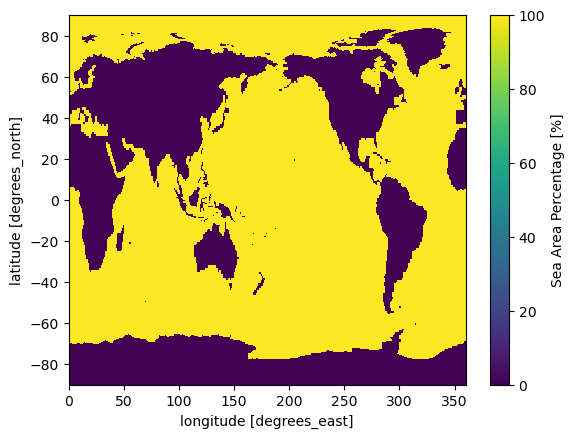

In [13]:
ds.sftof.plot() # causes a shift of the lon wrap point - is this expected? will need to document for users.

## Now try a different example with spatial subsetting and regridding

In [21]:
# try an example with spatial subsetting

tas = ops.Input(
    'tas', ['c3s-cmip6.CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Amon.tas.gr.v20180917'])
wf = ops.Subset(tas, area='0.,49.,10.,65')

In [22]:
resp = wf.orchestrate()
resp.ok 

True

In [23]:
resp.download_urls()

['http://rook7.cloud.dkrz.de:80/outputs/rook/acf73e88-a417-11f0-87df-fa163eb671ca/tas_Amon_CNRM-CM6-1_historical_r1i1p1f2_gr_18500116-20141216.nc']

In [24]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 745kB
Dimensions:      (time: 1980, axis_nbounds: 2, lat: 11, lon: 8)
Coordinates:
  * lat          (lat) float64 88B 49.73 51.13 52.53 53.93 ... 60.93 62.33 63.73
  * lon          (lon) float64 64B 0.0 1.406 2.812 4.219 5.625 7.031 8.438 9.844
    height       float64 8B ...
  * time         (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-1...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] 32kB ...
    tas          (time, lat, lon) float32 697kB ...
Attributes: (12/54)
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-06-20T08:40:07Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / CMIP...
    activity_id:            CMIP
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    tracking_id:            hdl:21.14100/87bf0ea8-e604-4581-b49d-0f98831346b1
    history:                Mon Jul 30 11:58:29 2018: ncatted -O -a tracking_...
    NCO:                    "4.5.5"

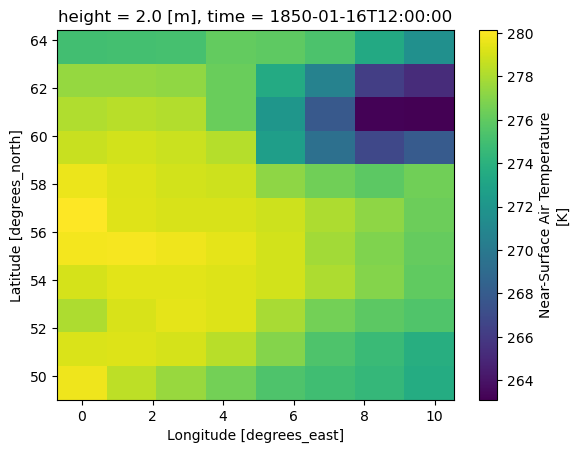

In [25]:
ds.tas[0].plot()

### Subset first then regrid - does not work as expected!

In [26]:
tas = ops.Input(
    'tas', ['c3s-cmip6.CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Amon.tas.gr.v20180917'])
wf = ops.Regrid(ops.Subset(tas, area='0.,49.,10.,65'), method="nearest_s2d", grid="0pt25deg")
resp = wf.orchestrate()
resp.ok 

True

In [28]:
resp.download_urls()
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 482, lat: 720, lon: 1440, bnds: 2, axis_nbounds: 2)
Coordinates:
    lat_bnds     (lat, bnds) float64 12kB ...
    lon_bnds     (lon, bnds) float64 23kB ...
  * lat          (lat) float64 6kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon          (lon) float64 12kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
    height       float64 8B ...
  * time         (time) datetime64[ns] 4kB 1850-01-16T12:00:00 ... 1890-02-15
    time_bounds  (time, axis_nbounds) datetime64[ns] 8kB ...
Dimensions without coordinates: bnds, axis_nbounds
Data variables:
    tas          (time, lat, lon) float32 2GB ...
Attributes: (12/59)
    name:                         /scratch/work/voldoire/outputs/CMIP6/DECK/C...
    Conventions:                  CF-1.7 CMIP-6.2
    creation_date:                2018-06-20T08:40:07Z
    description:                  CMIP6 historical
    title:                        CNRM-CM6-1 model output prepared for CMIP6 ...
    activity_id:                  CMIP
    ...                           ...
    grid_original:                data regridded to a T127 gaussian grid (128...
    grid_label_original:          gr
    nominal_resolution_original:  250 km
    regrid_operation:             nearest_s2d_11x8_720x1440
    regrid_tool:                  xESMF_v0.8.8
    regrid_weights_uid:           0870812f29cf8af51acef7d1b4e2f3f4_9e9ec0dc93...

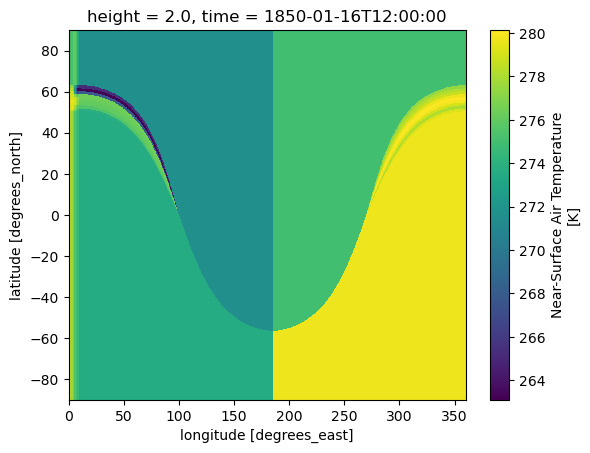

In [29]:
ds.tas[0].plot()

### regrid first then subset (works as expected)

In [32]:
tas = ops.Input(
    'tas', ['c3s-cmip6.CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Amon.tas.gr.v20180917'])
wf = ops.Subset(ops.Regrid(tas, method="nearest_s2d", grid="0pt25deg"), area='0.,49.,10.,65')
resp = wf.orchestrate()
resp.ok 

True

In [33]:
resp.download_urls()
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 20MB
Dimensions:      (time: 1980, lat: 64, lon: 40, bnds: 2, axis_nbounds: 2)
Coordinates:
    lat_bnds     (lat, bnds) float64 1kB ...
    lon_bnds     (lon, bnds) float64 640B ...
  * lat          (lat) float64 512B 49.12 49.38 49.62 ... 64.38 64.62 64.88
  * lon          (lon) float64 320B 0.125 0.375 0.625 ... 9.375 9.625 9.875
    height       float64 8B ...
  * time         (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-1...
    time_bounds  (time, axis_nbounds) datetime64[ns] 32kB ...
Dimensions without coordinates: bnds, axis_nbounds
Data variables:
    tas          (time, lat, lon) float32 20MB ...
Attributes: (12/59)
    name:                         /scratch/work/voldoire/outputs/CMIP6/DECK/C...
    Conventions:                  CF-1.7 CMIP-6.2
    creation_date:                2018-06-20T08:40:07Z
    description:                  CMIP6 historical
    title:                        CNRM-CM6-1 model output prepared for CMIP6 ...
    activity_id:                  CMIP
    ...                           ...
    grid_original:                data regridded to a T127 gaussian grid (128...
    grid_label_original:          gr
    nominal_resolution_original:  250 km
    regrid_operation:             nearest_s2d_128x256_720x1440_peri
    regrid_tool:                  xESMF_v0.8.8
    regrid_weights_uid:           90229ccc58a26ce268bc1fc5d0f7414a_9e9ec0dc93...

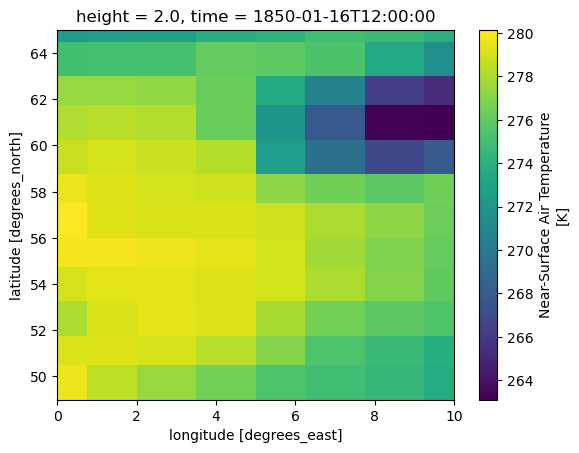

In [34]:
ds.tas[0].plot()